**Fraud detection CYO Project (Group D)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
pd.set_option('future.no_silent_downcasting', True)

In [2]:
dataset_path = 'card_transdata.csv'
verified_path = 'validation.csv'

#Reading Training data and Raw testing data

Training_Data = pd.read_csv(dataset_path, nrows=100000)
Raw_Target_Data = pd.read_csv(verified_path)
Raw_Data = Raw_Target_Data.drop(columns=['fraud'], inplace=False)
Raw_Data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.110868,7.266413,1.809086,1.0,0.0,0.0,1.0
1,4.955289,0.198219,0.441691,1.0,1.0,0.0,1.0
2,1.486395,0.590318,3.004239,0.0,0.0,0.0,0.0
3,1.876184,9.013384,3.249172,0.0,1.0,0.0,1.0
4,90.504708,9.882618,7.841419,1.0,0.0,0.0,0.0


In [3]:
Training_Data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
99995,1.674570,10.015549,0.618636,0.0,0.0,0.0,1.0,0.0
99996,16.908113,9.274847,0.251770,1.0,1.0,0.0,1.0,0.0
99997,6.195276,2.373588,9.652850,1.0,0.0,0.0,1.0,1.0
99998,43.637384,10.873590,4.108374,1.0,0.0,0.0,1.0,1.0


In [4]:
#Summary statistics
Training_Data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,26.688487,5.023716,1.819374,0.882090,0.351060,0.103250,0.650660,0.087100
std,65.132078,24.439420,2.912849,0.322503,0.477304,0.304287,0.476764,0.281983
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.864892,0.295815,0.476392,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965281,0.996695,0.996081,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.726777,3.333064,2.089016,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


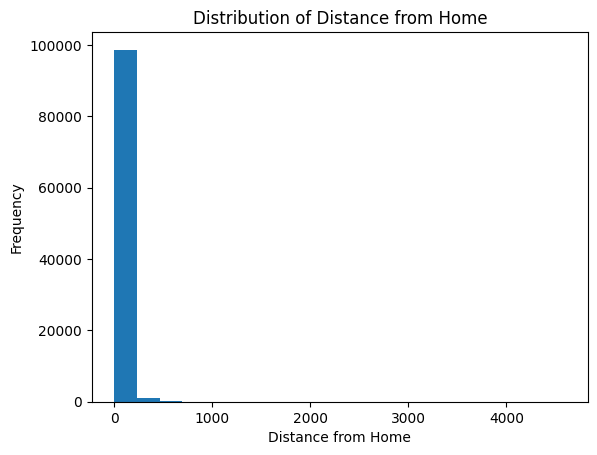

In [5]:
#Data distribution
import matplotlib.pyplot as plt

plt.hist(Training_Data['distance_from_home'], bins=20)
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distribution of Distance from Home')
plt.show()


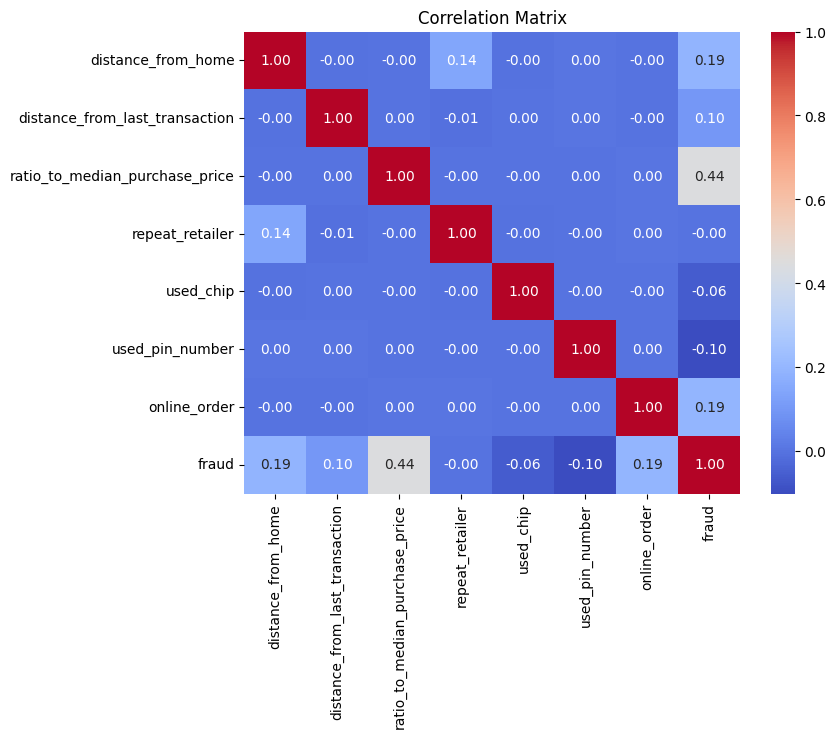

In [6]:
#Correlation analysis
correlation_matrix = Training_Data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
#Class distribution
fraud_distribution = Training_Data['fraud'].value_counts()
print(fraud_distribution)

fraud
0.0    91290
1.0     8710
Name: count, dtype: int64


In [8]:
#Converting Float typed of catagorical data into int
Training_Data[['repeat_retailer','used_chip','used_pin_number','online_order']] =Training_Data[['repeat_retailer','used_chip','used_pin_number','online_order']].astype(int)
Training_Data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0.0
1,10.829943,0.175592,1.294219,1,0,0,0,0.0
2,5.091079,0.805153,0.427715,1,0,0,1,0.0
3,2.247564,5.600044,0.362663,1,1,0,1,0.0
4,44.190936,0.566486,2.222767,1,1,0,1,0.0
...,...,...,...,...,...,...,...,...
99995,1.674570,10.015549,0.618636,0,0,0,1,0.0
99996,16.908113,9.274847,0.251770,1,1,0,1,0.0
99997,6.195276,2.373588,9.652850,1,0,0,1,1.0
99998,43.637384,10.873590,4.108374,1,0,0,1,1.0


In [9]:
Raw_Data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.110868,7.266413,1.809086,1.0,0.0,0.0,1.0
1,4.955289,0.198219,0.441691,1.0,1.0,0.0,1.0
2,1.486395,0.590318,3.004239,0.0,0.0,0.0,0.0
3,1.876184,9.013384,3.249172,0.0,1.0,0.0,1.0
4,90.504708,9.882618,7.841419,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99996,3.295884,0.085712,0.831991,1.0,0.0,0.0,1.0
99997,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
99998,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
99999,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0


In [10]:
#Turning all catagorical data into int
Raw_Data[['repeat_retailer','used_chip','used_pin_number','online_order']] =Raw_Data[['repeat_retailer','used_chip','used_pin_number','online_order']].astype(int)
Raw_Data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.110868,7.266413,1.809086,1,0,0,1
1,4.955289,0.198219,0.441691,1,1,0,1
2,1.486395,0.590318,3.004239,0,0,0,0
3,1.876184,9.013384,3.249172,0,1,0,1
4,90.504708,9.882618,7.841419,1,0,0,0
...,...,...,...,...,...,...,...
99996,3.295884,0.085712,0.831991,1,0,0,1
99997,2.207101,0.112651,1.626798,1,1,0,0
99998,19.872726,2.683904,2.778303,1,1,0,0
99999,2.914857,1.472687,0.218075,1,1,0,1


In [11]:
#Missing values and outliers
import pandas as pd
from glob import glob

#Preparing the data
def prepare_data(path):
    file_paths = glob(path)
    dataframes = [pd.read_csv(file) for file in file_paths]
    Training_Data = pd.concat(dataframes)


missing_values = Training_Data.isnull().sum()

Training_Data = Training_Data.dropna()

numerical_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
for col in numerical_columns:
    col_mean = Training_Data[col].mean()
    col_std = Training_Data[col].std()
    outliers_index = Training_Data.index[(Training_Data[col] - col_mean).abs() > 3 * col_std]
    
Training_Data = Training_Data.drop(outliers_index)

Training_Data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0.0
1,10.829943,0.175592,1.294219,1,0,0,0,0.0
2,5.091079,0.805153,0.427715,1,0,0,1,0.0
3,2.247564,5.600044,0.362663,1,1,0,1,0.0
4,44.190936,0.566486,2.222767,1,1,0,1,0.0
...,...,...,...,...,...,...,...,...
99995,1.674570,10.015549,0.618636,0,0,0,1,0.0
99996,16.908113,9.274847,0.251770,1,1,0,1,0.0
99997,6.195276,2.373588,9.652850,1,0,0,1,1.0
99998,43.637384,10.873590,4.108374,1,0,0,1,1.0


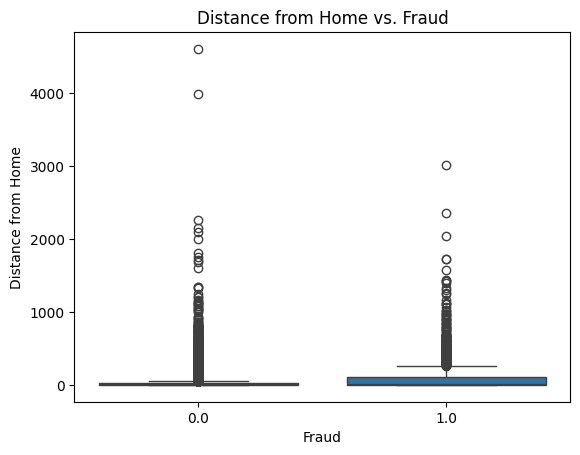

In [12]:
#Feature Analysis
sns.boxplot(x='fraud', y='distance_from_home', data=Training_Data)
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.title('Distance from Home vs. Fraud')
plt.show()


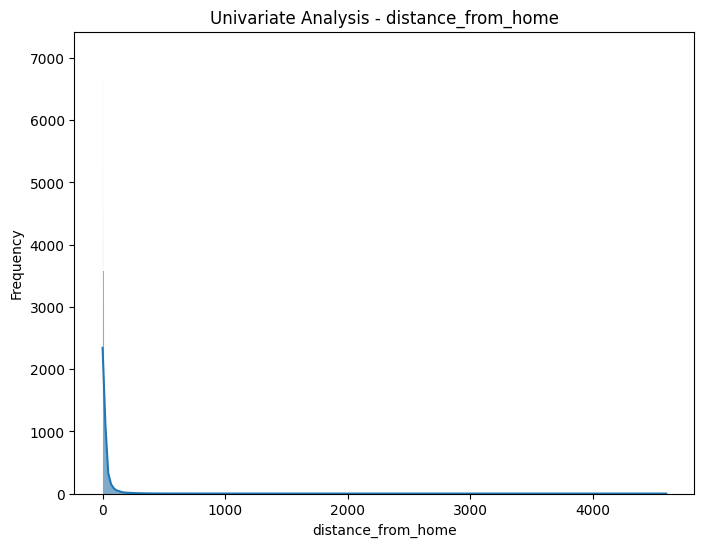

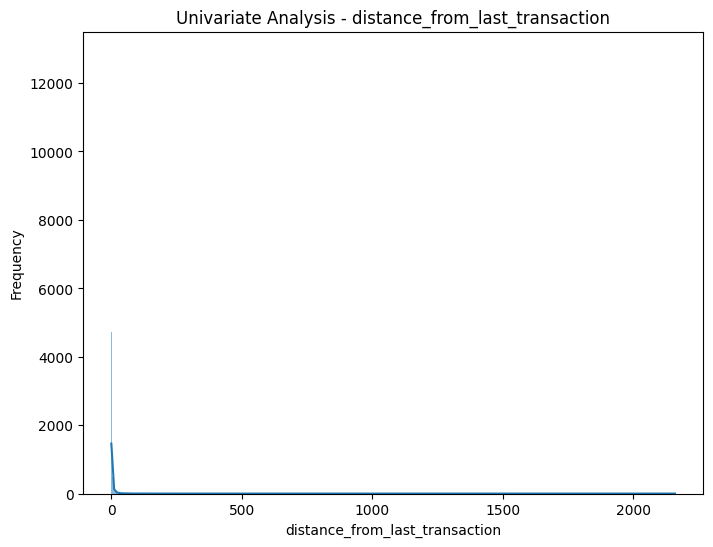

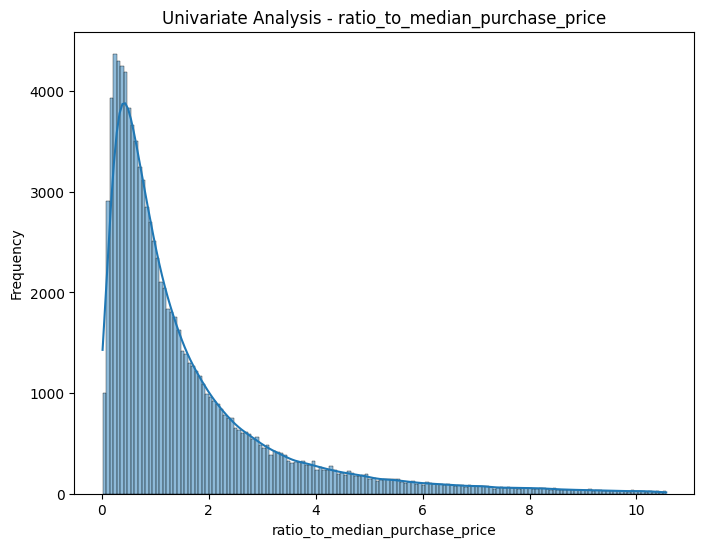

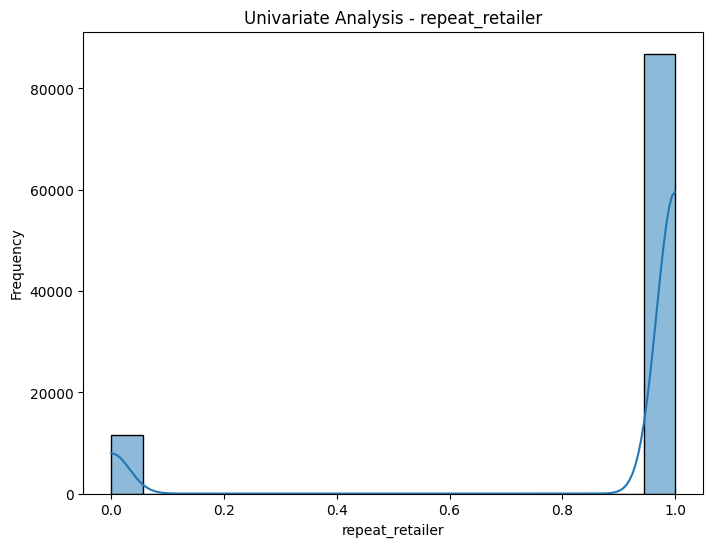

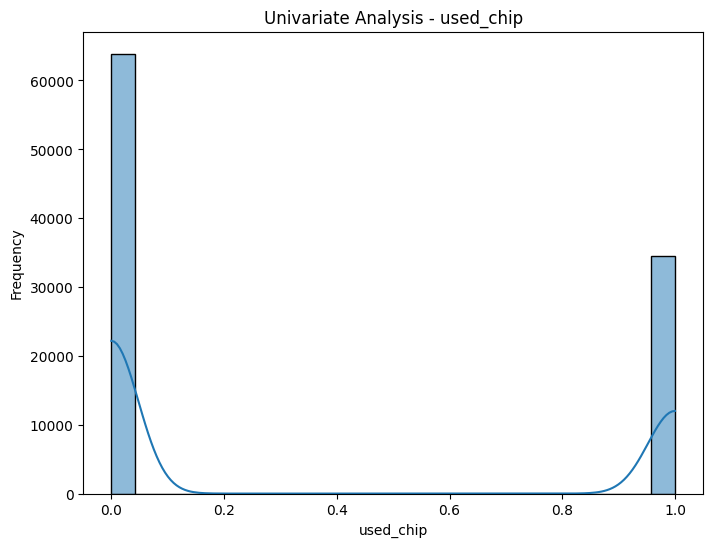

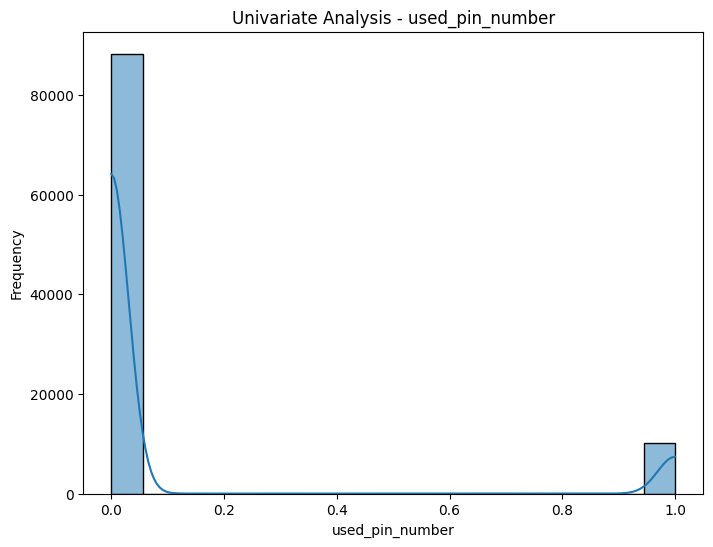

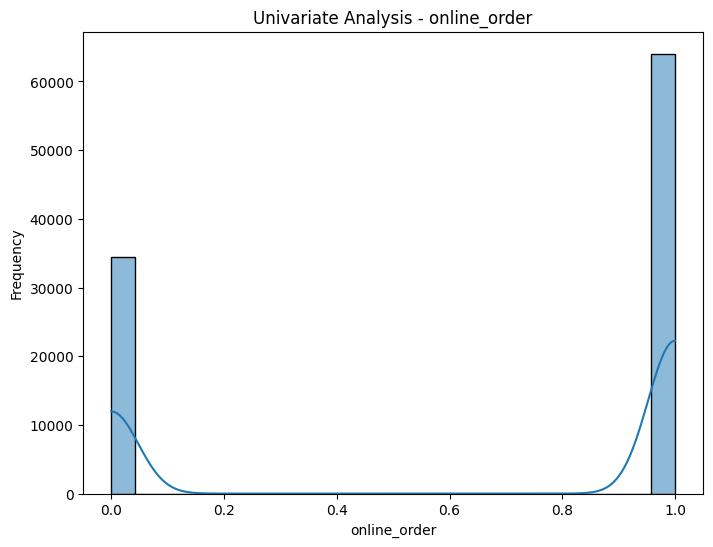

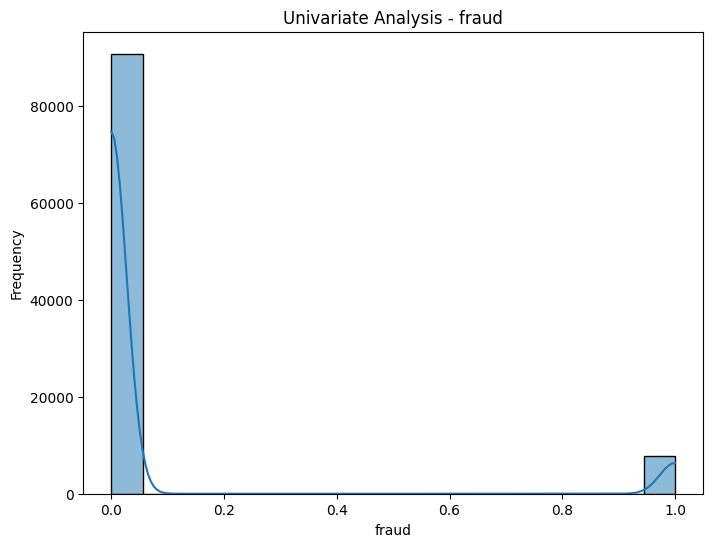

In [13]:

# Univariate Analysis

# Numeric Variables
numeric_vars = Training_Data.select_dtypes(include=[np.number]).columns
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(Training_Data[var], kde=True)
    plt.title(f'Univariate Analysis - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
   
# Categorical Variables
categorical_vars = Training_Data.select_dtypes(include=[object]).columns
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=Training_Data, x=var)
    plt.title(f'Univariate Analysis - {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

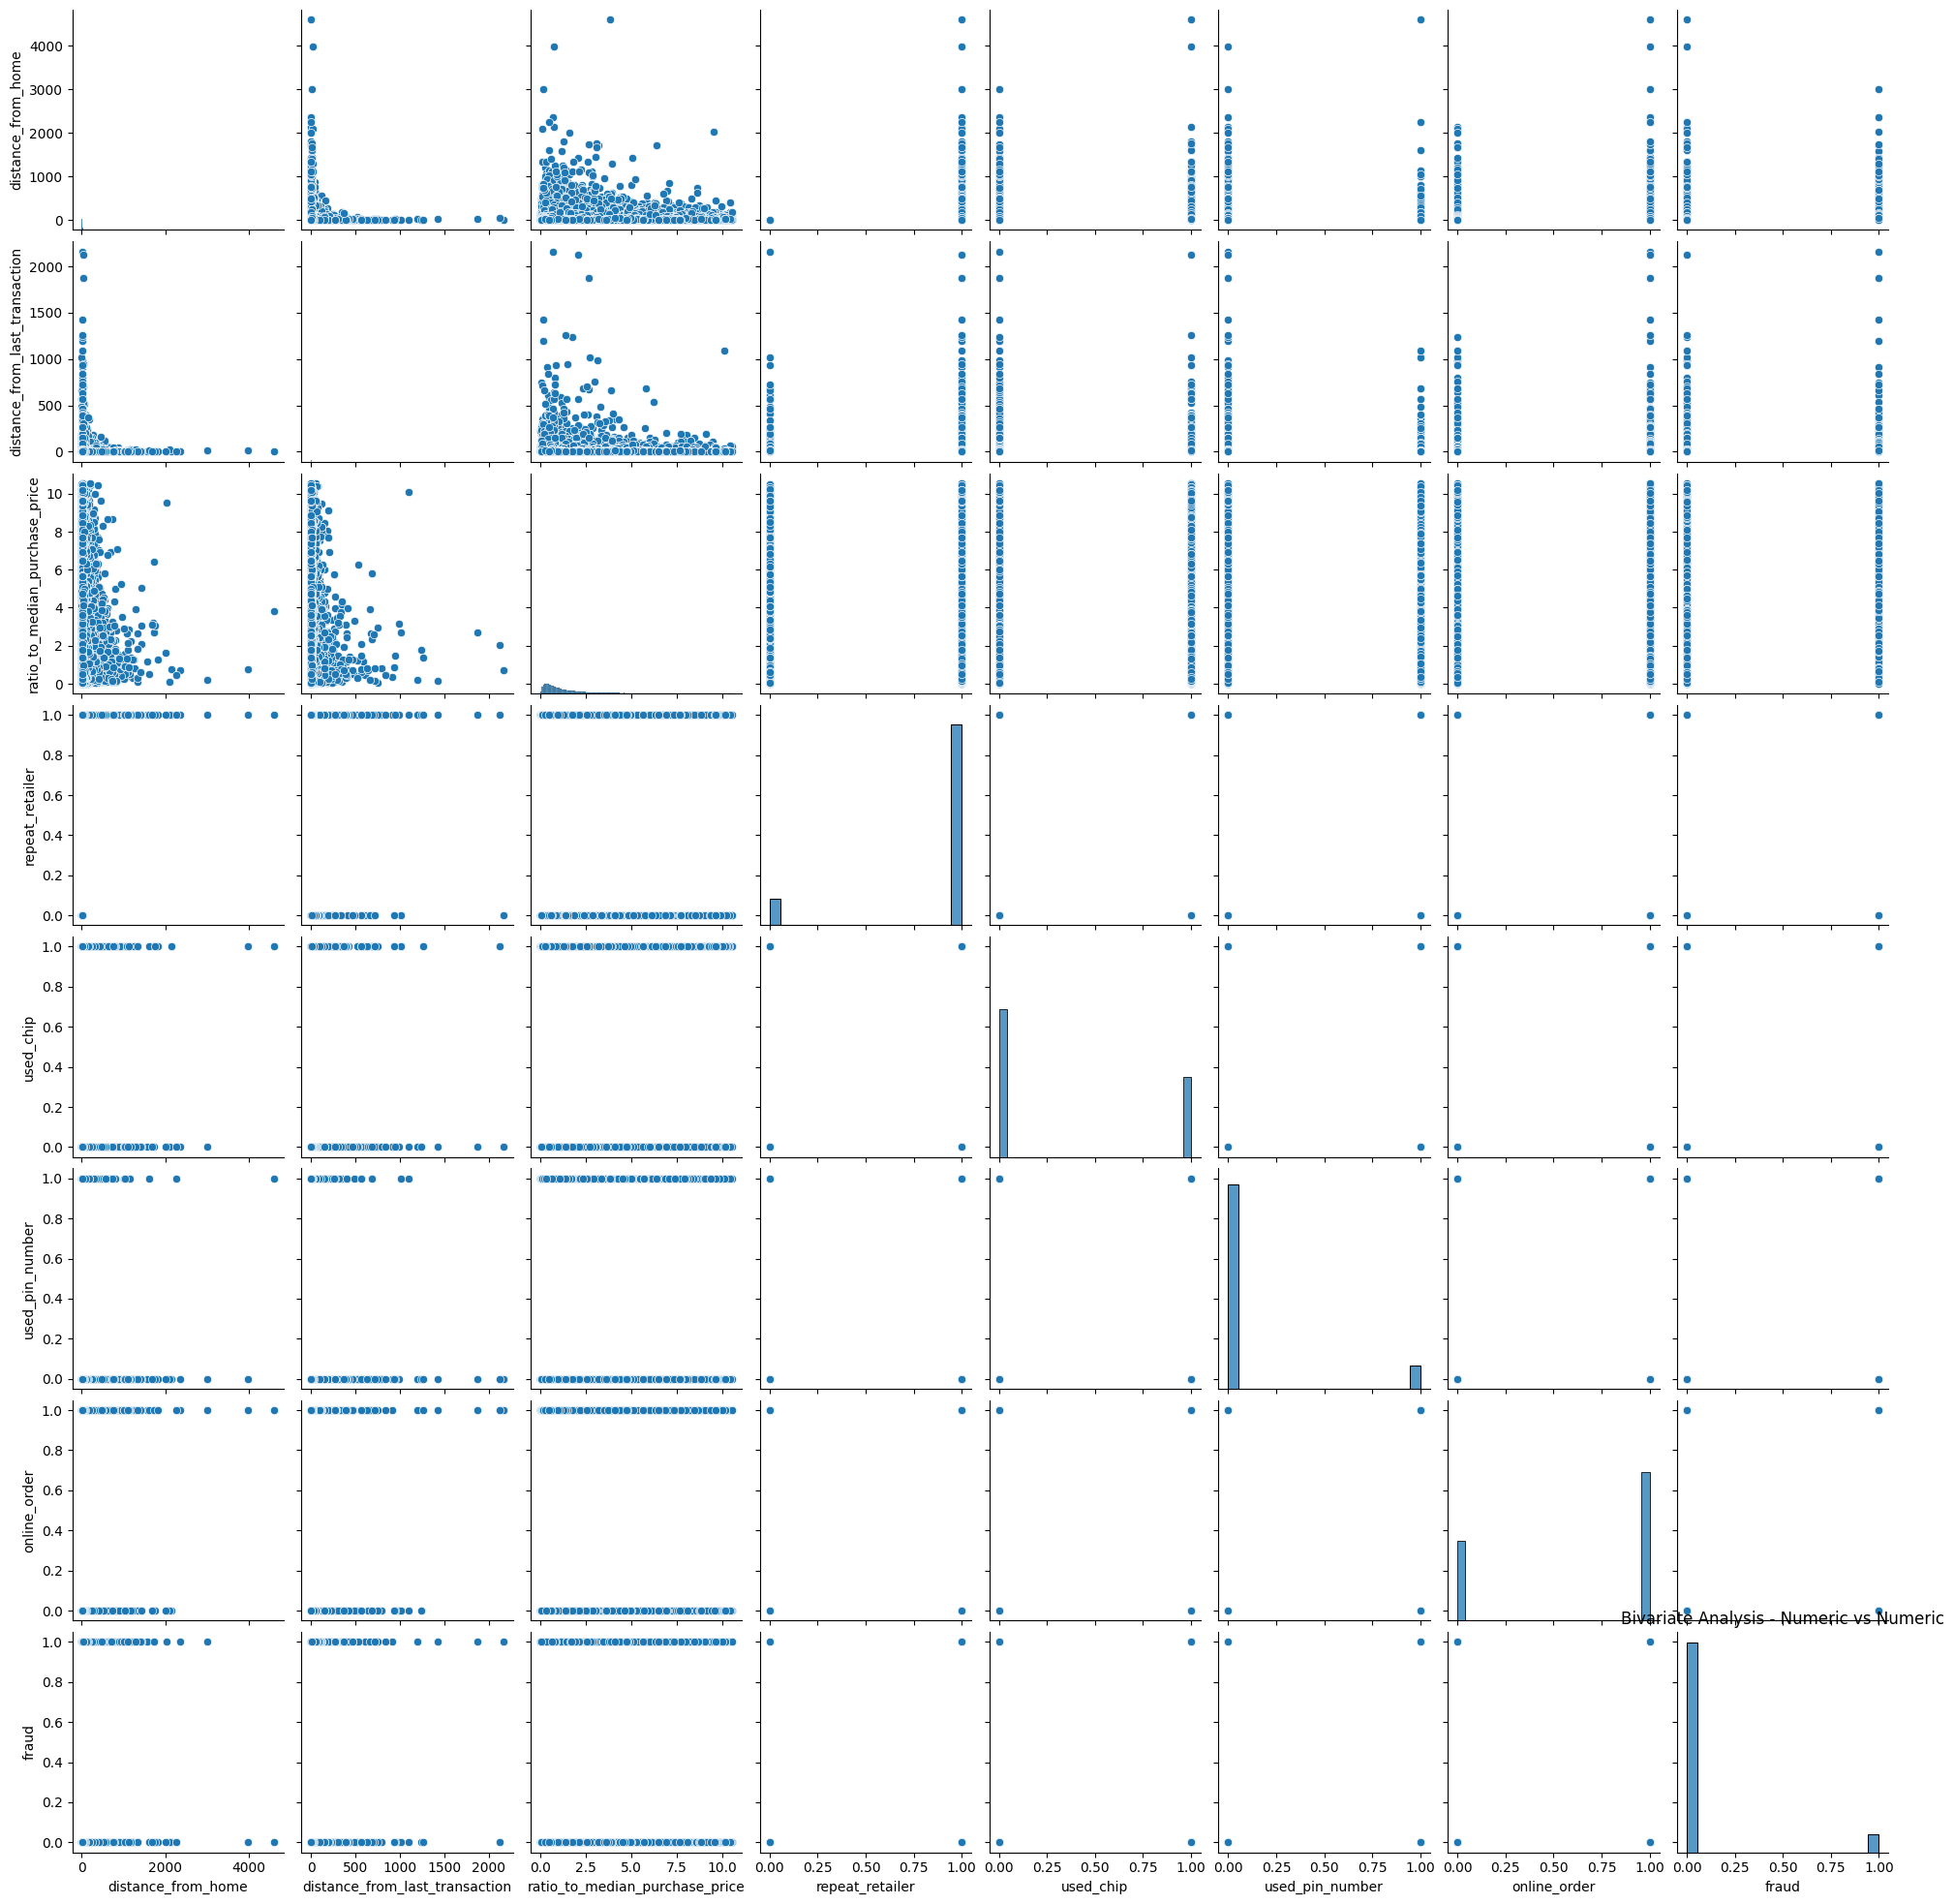

In [14]:

# Bivariate Analysis    
# Numeric vs Numeric
numeric_vars = Training_Data.select_dtypes(include=[np.number]).columns
sns.pairplot(Training_Data[numeric_vars])
plt.title('Bivariate Analysis - Numeric vs Numeric')
plt.show()
  
# Numeric vs Categorical
categorical_vars = Training_Data.select_dtypes(include=[object]).columns
for cat_var in categorical_vars:
    for num_var in numeric_vars:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=Training_Data, x=cat_var, y=num_var)
        plt.title(f'Bivariate Analysis - {cat_var} vs {num_var}')
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.xticks(rotation=45)
        plt.show()

**Creating machine learning algorithms**

Logistic Regression Random_Forest_search:

In [15]:
#dropping target column for the training dataset
label = 'fraud'
X = Training_Data.drop(columns=[label], inplace=False)
y = Training_Data[label]

In [16]:
#Splitting the training data and the validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of splitted data
print(
    f'Training dataset \
    \nX_train: {X_train.shape[0]/len(X)*100:.0f}% \ny_train: {y_train.shape[0]/len(X)*100:.0f}% \
    \n\nValidation dataset \
    \nX_val: {X_val.shape[0]/len(X)*100:.0f}% \ny_val: {y_val.shape[0]/len(X)*100:.0f}%'
)

Training dataset     
X_train: 80% 
y_train: 80%     

Validation dataset     
X_val: 20% 
y_val: 20%


In [17]:
#Benchmarking the baseline accuracy
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the benchmark
y_mean = (y_train.mean())

y_pred_baseline = [y_mean]*len(y_train)


print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.92


In [18]:
#Creating the Logistic Regression Random_Forest_search and encoding the catagorical columns
Logistic_Regression_Model = make_pipeline(
    OneHotEncoder(use_cat_names=True,cols=['repeat_retailer','used_chip','used_pin_number','online_order']),
    LogisticRegression(max_iter=1000)
)
# Fit Random_Forest_search to training data
Logistic_Regression_Model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['repeat_retailer', 'used_chip',
                                     'used_pin_number', 'online_order'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [20]:
#Odds ratio of Logistic regression Random_Forest_search
features = Logistic_Regression_Model.named_steps["onehotencoder"].get_feature_names_out()
coefs = Logistic_Regression_Model.named_steps["logisticregression"].coef_[0]

odds_ratios = pd.Series(np.exp(coefs), index=features).sort_values()
odds_ratios.head()

used_pin_number_1.0    0.001312
online_order_0.0       0.005340
used_chip_1.0          0.056999
repeat_retailer_1.0    0.085483
repeat_retailer_0.0    0.147579
dtype: float64

In [21]:
#Creating bar chart to see what feature effects the likelihood of churn the most
plt.Figure(figsize=(15,10))
fig = px.bar(
    data_frame=odds_ratios, 
    x=odds_ratios[:15].values, 
    y=odds_ratios[:15].index, 
    title="Customer Churn Logistic Regression, Feature Importance (Odds Ratio)"
)

fig.update_layout(xaxis_title='Odds Ratio', yaxis_title='')
fig.show()

In [22]:
#Testing the accuracy of the Random_Forest_search
lr_train_acc = Logistic_Regression_Model.score(X_train, y_train)
lr_val_acc = Logistic_Regression_Model.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.966165174887323
Logistic Regression, Validation Accuracy Score: 0.9694292098314036


In [23]:
#Saving Random_Forest_search to a file
joblib.dump(Logistic_Regression_Model, 'logistic.joblib')

['logistic.joblib']

In [24]:
#Loading the Random_Forest_search and using it to predict the training data
Logistic_Regression_Model = joblib.load('logistic.joblib')
Logistic_Regression_Model.predict(X_val)

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
#Using the Random_Forest_search to predict Unseen data
Logistic_Regression_Result= Logistic_Regression_Model.predict(Raw_Data)
Logistic_Regression_Result[:100]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [26]:
#accuracy of the Random_Forest_search compared to the target values of the unseen data
y_pred_real = Logistic_Regression_Model.predict(Raw_Data)
y_real = Raw_Target_Data['fraud']

Logistic_Unseen_Accuracy = r2_score(y_real, y_pred_real)
Logistic_Unseen_Accuracy

0.5296400154808703

Random Forest Regressor:

In [27]:
#Creating the Random Forest Regressor Random_Forest_search
Random_Forest_Model = make_pipeline(

    OneHotEncoder(use_cat_names=True,cols=['repeat_retailer','used_chip','used_pin_number','online_order']),

    # Imputation
    SimpleImputer(),

    # build Random_Forest_search
    RandomForestRegressor(
        random_state=42)
    )

#fit the Random_Forest_search
Random_Forest_Model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['repeat_retailer', 'used_chip',
                                     'used_pin_number', 'online_order'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [28]:
#Predict the train data
y_pred_training = Random_Forest_Model.predict(X_train)
y_pred_test = Random_Forest_Model.predict(X_val)

#Accuracy
rf_train_acc = r2_score(y_train, y_pred_training)
rf_train_acc


0.999762463372177

In [29]:
#Parameters for Cross-Validation
params = {
    "randomforestregressor__n_estimators": range(25, 100, 25),
    "randomforestregressor__max_depth": range(10, 50, 10)
}
params

{'randomforestregressor__n_estimators': range(25, 100, 25),
 'randomforestregressor__max_depth': range(10, 50, 10)}

In [30]:
#max_depth
[i for i in range(10, 50, 10)]

[10, 20, 30, 40]

In [31]:
#n_estimators
[j for j in range(25, 100, 25)]

[25, 50, 75]

In [32]:
#Creating GridSearchCV for Cross-validation
Random_Forest_search = GridSearchCV(
    Random_Forest_Model,
    param_grid=params,
    cv=2,
    n_jobs=-1,
    verbose=1
)

#Fit the Random_Forest_search
Random_Forest_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['repeat_retailer',
                                                            'used_chip',
                                                            'used_pin_number',
                                                            'online_order'],
                                                      use_cat_names=True)),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [33]:
#Cross-Validation
cross_val_score(Random_Forest_search, X_train, y_train, cv=2, n_jobs=-1, verbose=1)
cv_results = pd.DataFrame(Random_Forest_search.cv_results_)
Random_Forest_search.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.7s finished


{'randomforestregressor__max_depth': 10,
 'randomforestregressor__n_estimators': 75}

In [34]:
#Saving the Random Forest Regression model
joblib.dump(Random_Forest_search, 'randomforestregressor.joblib')

['randomforestregressor.joblib']

In [35]:
#Testing the model on the training data
Random_Forest_Model= joblib.load('randomforestregressor.joblib')
Random_Forest_Model.predict(X_val)

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
#Testing the model on Unseen data
result_rf=  Random_Forest_Model.predict(Raw_Data)
result_rf[-100:]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
#Accuracy of model on unseen data
y_pred_real = Random_Forest_Model.predict(Raw_Data)
y_real = Raw_Target_Data['fraud']

Random_Forest_accuracy = r2_score(y_real, y_pred_real)
Random_Forest_accuracy


0.9986504193105684

Desicion Tree Model:

In [38]:
depth_hyperparams = range(1, 16)

# List of scores per each set for visualization purpose
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Build Random_Forest_search
    model_dt = make_pipeline(
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # Fit Random_Forest_search
    model_dt.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))

In [39]:
tune_data = pd.DataFrame(
    data = {'Training': training_acc, 'Validation': validation_acc}, 
    index=depth_hyperparams
)

# Display the figure
fig = px.line(
    data_frame=tune_data, 
    x=depth_hyperparams, 
    y=['Training', 'Validation'], 
    title="Training & Validation Curves (Decision Tree Random_Forest_search)"
)

# Add axes titles
fig.update_layout(xaxis_title ="Maximum Depth", yaxis_title="Acccuracy Score")
fig.show()

In [40]:
import joblib
final_model_dt = make_pipeline(
    DecisionTreeClassifier(max_depth=6, random_state=42)
)

# Fit Final Random_Forest_search
final_model_dt.fit(X_train, y_train)

file = 'decision_tree_model_dt.joblib'
joblib.dump(final_model_dt, file)

['decision_tree_model_dt.joblib']

In [41]:
y_val_pred = final_model_dt.predict(X_val)
y_val_pred[:5]

array([0., 0., 0., 0., 0.])

In [42]:
y_val_pred = final_model_dt.predict(Raw_Data)
y_val_pred[:5]

array([0., 0., 0., 0., 0.])

In [43]:
print(f'Final Random_Forest_search accuracy: {accuracy_score(y_val, final_model_dt.predict(X_val))}')

Final Random_Forest_search accuracy: 0.9996953077391835


# Dash

In [ ]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load pre-trained Random_Forest_search
file = 'final_model_dt.joblib'
Random_Forest_search = joblib.load(file)

# Define Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.Div([
        html.Label('Distance from Home'),
        html.Br(),
        dcc.Input(id='distance_from_home', type='number', value=0),
        html.Br(),
        html.Label('Distance from Last Transaction'),
        html.Br(),
        dcc.Input(id='distance_from_last_transaction', type='number', value=0),
        html.Br(),
        html.Label('Ratio to Median Purchase Price'),
        html.Br(),
        dcc.Input(id='ratio_to_median_purchase_price', type='number', value=0),
        html.Br(),
        html.Label('Repeat Retailer'),
        html.Br(),
        dcc.Input(id='repeat_retailer', type='number', value=0),
        html.Br(),
        html.Label('Used Chip'),
        html.Br(),
        dcc.Input(id='used_chip', type='number', value=0),
        html.Br(),
        html.Label('Used Pin Number'),
        html.Br(),
        dcc.Input(id='used_pin_number', type='number', value=0),
        html.Br(),
        html.Label('Online Order'),
        html.Br(),
        dcc.Input(id='online_order', type='number', value=0),
        html.Br(),
        html.Button('Predict', id='predict-button', n_clicks=0),
        html.Div(id='prediction-output')
    ])
])

# Define callback to make predictions
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [
        State('distance_from_home', 'value'),
        State('distance_from_last_transaction', 'value'),
        State('ratio_to_median_purchase_price', 'value'),
        State('repeat_retailer', 'value'),
        State('used_chip', 'value'),
        State('used_pin_number', 'value'),
        State('online_order', 'value')
    ]
)
def predict_fraud(n_clicks, distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order):
    # Preprocess input data
    data = pd.DataFrame({
        'distance_from_home': [distance_from_home],
        'distance_from_last_transaction': [distance_from_last_transaction],
        'ratio_to_median_purchase_price': [ratio_to_median_purchase_price],
        'repeat_retailer': [repeat_retailer],  # Replace 0 with the actual value
        'used_chip': [used_chip],  # Replace 0 with the actual value
        'used_pin_number': [used_pin_number],  # Replace 0 with the actual value
        'online_order': [online_order]  # Replace 0 with the actual value
    })
    
    # Perform one-hot encoding on categorical columns
    categorical_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
    data_encoded = pd.get_dummies(data, columns=categorical_columns)
    
    # Scale numerical columns
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_encoded)
    
    # Make predictions
    prediction = Random_Forest_search.predict(data_scaled)
    if prediction[0] == 1:
        return "Fraud detected!"
    else:
        return "No fraud detected."


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


ModuleNotFoundError: No module named 'dash'